In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/loan_approval_dataset.csv")
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [ ]:
df = df.drop(["loan_id"],axis=1)
df.head()

#Dropping Unnecessary Columns

no_of_dependents      education  self_employed   income_annum  \
0                  2       Graduate             No        9600000   
1                  0   Not Graduate            Yes        4100000   
2                  3       Graduate             No        9100000   
3                  3       Graduate             No        8200000   
4                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [ ]:
df.shape

(4269, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df[" education"] = le.fit_transform(df[" education"])
df[" self_employed"] = le.fit_transform(df[" self_employed"])
df[" loan_status"] = le.fit_transform(df[" loan_status"])

In [ ]:
df.head()

no_of_dependents   education   self_employed   income_annum   loan_amount  \
0                  2           0               0        9600000      29900000   
1                  0           1               1        4100000      12200000   
2                  3           0               0        9100000      29700000   
3                  3           0               0        8200000      30700000   
4                  5           1               1        9800000      24200000   

    loan_term   cibil_score   residential_assets_value  \
0          12           778                    2400000   
1           8           417                    2700000   
2          20           506                    7100000   
3           8           467                   18200000   
4          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

    loan_status  
0             0  
1             1  
2             1  
3             1  
4             1

In [ ]:
df.describe().T.style.background_gradient(cmap='Greens')

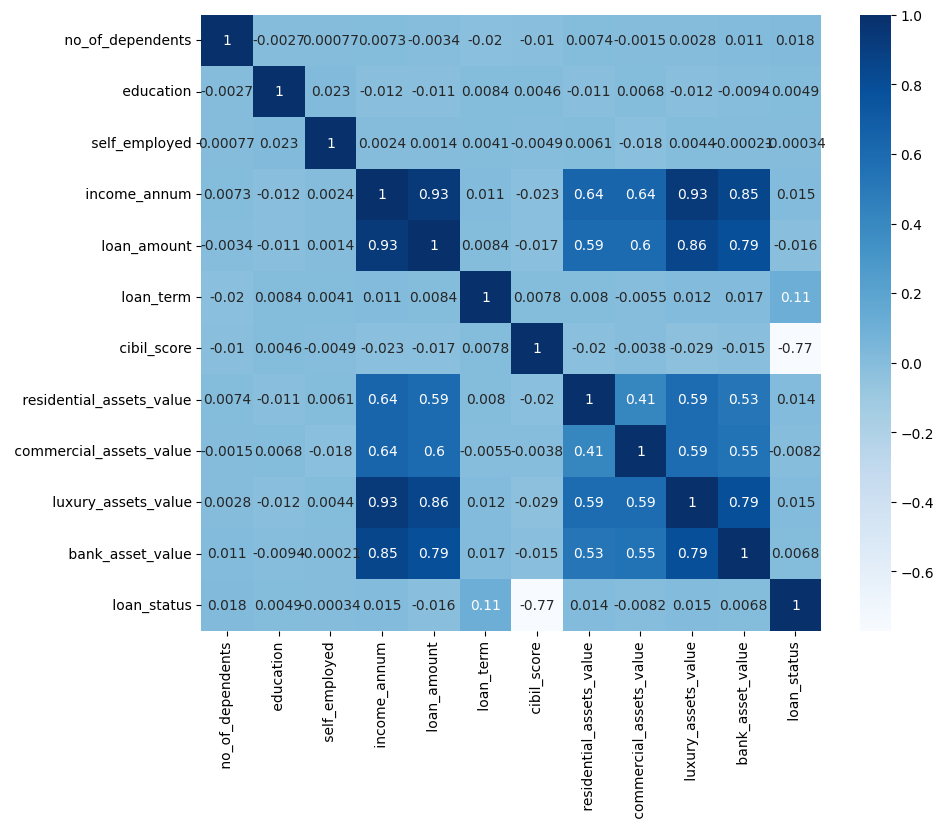

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

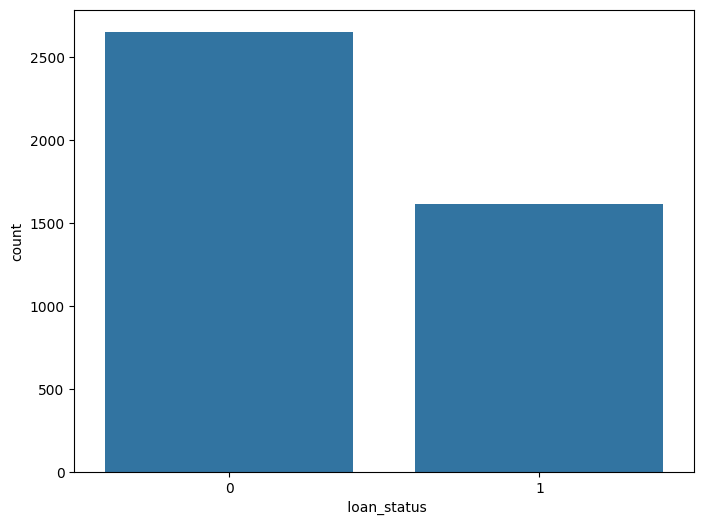

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df,x=" loan_status")
plt.show()

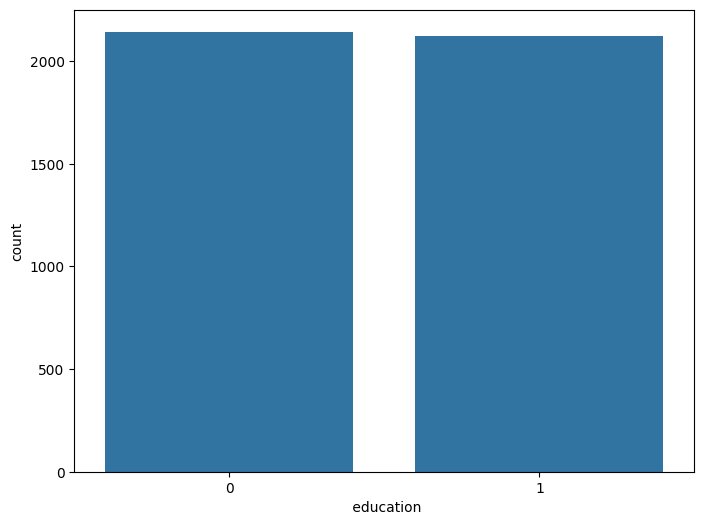

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df,x=" education")
plt.show()

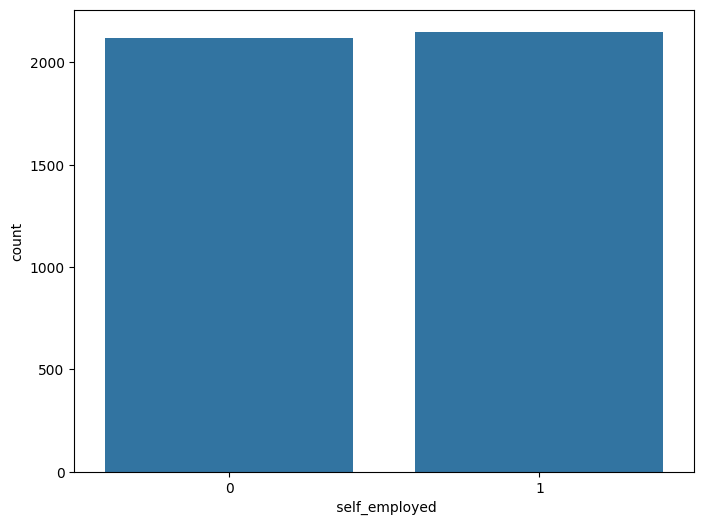

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df,x=" self_employed")
plt.show()

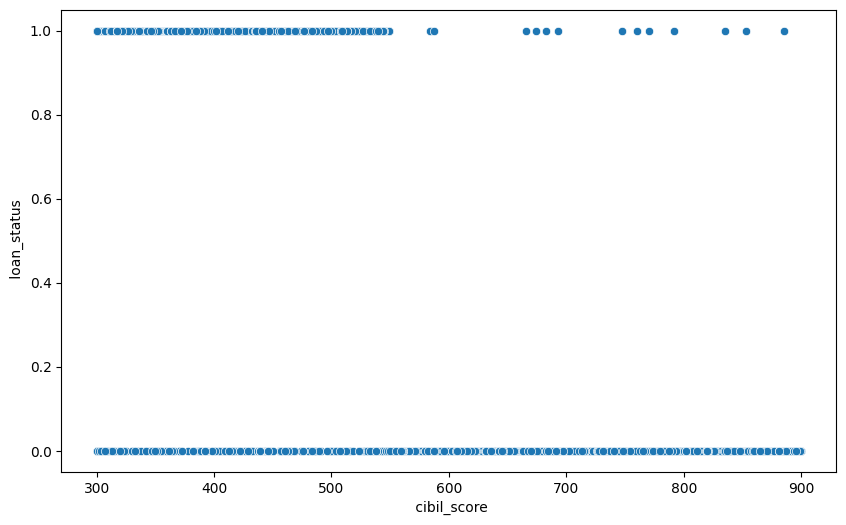

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=' cibil_score',y=' loan_status',data=df)
plt.show()

In [ ]:
x = df.drop([" loan_status"],axis=1)
y = df[" loan_status"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
regpred = reg.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)


              precision    recall  f1-score   support

           0       0.62      0.99      0.77       529
           1       0.62      0.02      0.03       325

    accuracy                           0.62       854
   macro avg       0.62      0.50      0.40       854
weighted avg       0.62      0.62      0.49       854

Accuracy of Logistic Regression is :  62.177985948477755


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("Mean Absolute Error : ",mean_absolute_error(y_test,regpred))
print("Mean Squared Error : ",mean_squared_error(y_test,regpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,regpred)))
print("R2 Score : ",r2_score(y_test,regpred))

Mean Absolute Error :  0.4028103044496487
Mean Squared Error :  0.4028103044496487
Root Mean Squared Error :  0.6346733840721924
R2 Score :  -0.674509803921568


In [ ]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtreepred = dtree.predict(x_test)

print(classification_report(y_test,dtreepred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred)*100)


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       510
           1       0.97      0.99      0.98       344

    accuracy                           0.99       854
   macro avg       0.98      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854

Accuracy of Decision Tree is :  98.59484777517564


In [ ]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,dtreepred))
print("Mean Squared Error : ",mean_squared_error(y_test,dtreepred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,dtreepred)))
print("R2 Score : ",r2_score(y_test,dtreepred))

Mean Absolute Error :  0.01405152224824356
Mean Squared Error :  0.01405152224824356
Root Mean Squared Error :  0.11853911695403994
R2 Score :  0.9415868673050616


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_pred = nb_model.predict(x_test)

print(classification_report(y_test, nb_pred))
print("Accuracy of Naive Bayes is : ", accuracy_score(y_test, nb_pred)*100)


              precision    recall  f1-score   support

           0       0.71      0.97      0.82       510
           1       0.91      0.40      0.56       344

    accuracy                           0.74       854
   macro avg       0.81      0.69      0.69       854
weighted avg       0.79      0.74      0.71       854

Accuracy of Naive Bayes is :  74.35597189695551


In [ ]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,nb_pred))
print("Mean Squared Error : ",mean_squared_error(y_test,nb_pred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,nb_pred)))
print("R2 Score : ",r2_score(y_test,nb_pred))

Mean Absolute Error :  0.25644028103044497
Mean Squared Error :  0.25644028103044497
Root Mean Squared Error :  0.5063993296109751
R2 Score :  -0.06603967168262614


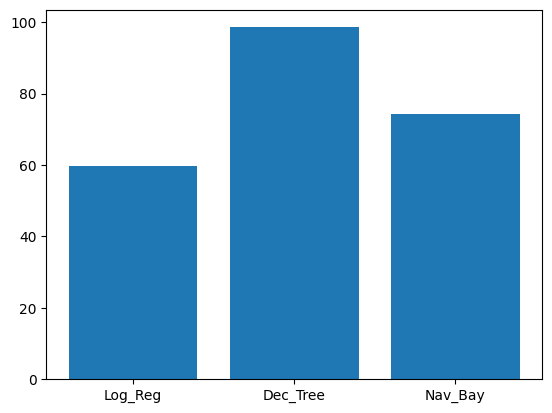

In [ ]:
Log_Reg = accuracy_score(y_test,regpred)*100
Dec_Tree = accuracy_score(y_test,dtreepred)*100
Nav_Bay = accuracy_score(y_test,nb_pred)*100

Model = ['Log_Reg','Dec_Tree','Nav_Bay']
Score = [Log_Reg,Dec_Tree,Nav_Bay]
barplot = plt.bar(x=Model,height=Score)
plt.show()

In [ ]:
importances = dtree.feature_importances_
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

                      feature  importance
6                 cibil_score    0.820183
5                   loan_term    0.078449
3                income_annum    0.037213
4                 loan_amount    0.036912
9         luxury_assets_value    0.008757
10           bank_asset_value    0.008094
0            no_of_dependents    0.004940
7    residential_assets_value    0.004421
8     commercial_assets_value    0.001031
1                   education    0.000000
2               self_employed    0.000000
